# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [31]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
PCA uses vectors with maximum variance as its first dimensions, ICA finds vectors that are statistically independent. Features with higher variance expected to have higher weight in PCA vectors.

###PCA

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.001936 -0.072593  0.055100  0.001769         -0.015715      0.017071
1 -0.004881 -0.001618 -0.005714 -0.002532          0.002434      0.050966
2 -0.002673  0.013988 -0.060280 -0.002041          0.003012      0.003994
3 -0.010931 -0.001033  0.007351  0.054049         -0.002652     -0.016768
4  0.050225 -0.006320 -0.005836 -0.003289          0.009719     -0.002954
5 -0.003810  0.016886  0.114882 -0.007081         -0.134369     -0.016155
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


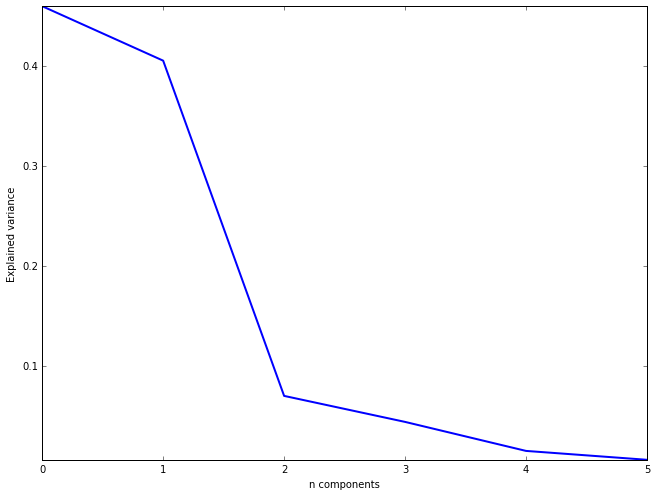

In [97]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=6)
pca.fit_transform(data)

# Print the components and the amount of variance in the data contained in each dimension
pca_components = pd.DataFrame(ica.components_)
pca_components.columns = ["Fresh", "Milk", "Grocery", "Frozen", 
                          "Detergents_Paper", "Delicatessen"]
print pca_components
print pca.explained_variance_ratio_

# Explained variance plot
plt.figure()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n components')
plt.ylabel('Explained variance')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
The variance seems to drop off significantly after the second dimension, using only two dimensions is the most optimal choice for this problem. Higher number of dimensions is not beneficial for segmenting the dataset by the types of customers. 

**3)** What do the dimensions seem to represent? How can you use this information?

(-2, 2)

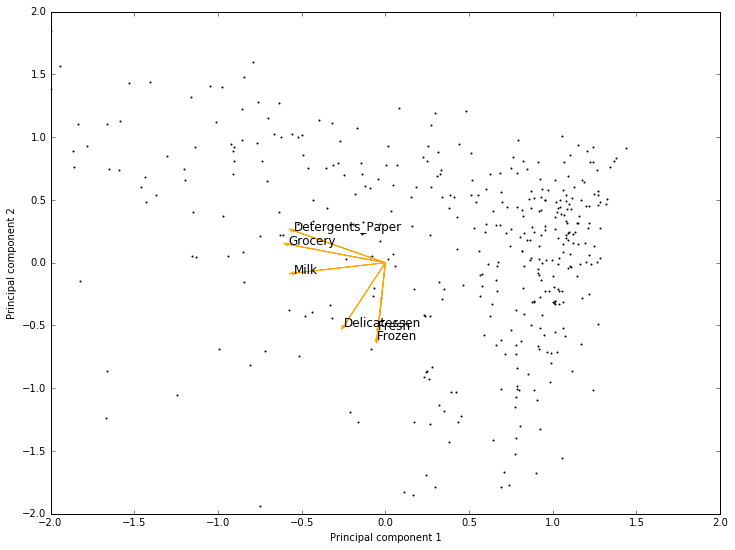

In [109]:
# Principal components plot
data_scaled = preprocessing.scale(data)
pca = PCA(n_components=2).fit(data_scaled)
ax = pd.DataFrame(pca.transform(data_scaled),
                 columns=["Principal component 1", "Principal component 2"]).plot(
    kind="scatter",
    x="Principal component 1", y="Principal component 2", s=1)
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.arrow(0, 0, pc1, pc2, width=0.001, fc="orange", ec="orange")
    ax.annotate(data.columns[i], (pc1, pc2), size=12)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

Answer: 
The plot above shows feature vectors on 2D plane where x axis is the first principal component and y axis is the second principal component. The first PC corresponds to a line that passes through the multidimensional mean and minimizes the sum of squares of the distances of the points from the line, the second PC corresponds to the same concept and is orthogonal to the first PC.<br>
In this case the first component gives higher weight to "Grocery", "Milk" and "Detergents_Paper" features. The second component places more weight on “Fresh”, “Frozen” and “Delicatessen”.

###ICA

In [127]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4, random_state=777)
ica.fit(data_scaled)

# Print the independent components
ica_components = pd.DataFrame(ica.components_)
ica_components.columns = ["Fresh", "Milk", "Grocery", "Frozen", 
                          "Detergents_Paper", "Delicatessen"]
print ica_components

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.049689  0.000195  0.000555 -0.003817         -0.001293     -0.005996
1  0.010743  0.002526 -0.002107 -0.054296         -0.003388      0.015559
2  0.005665 -0.011443  0.004272  0.003472          0.009802     -0.046094
3 -0.003020 -0.013002 -0.019369 -0.002489         -0.020304      0.007837


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

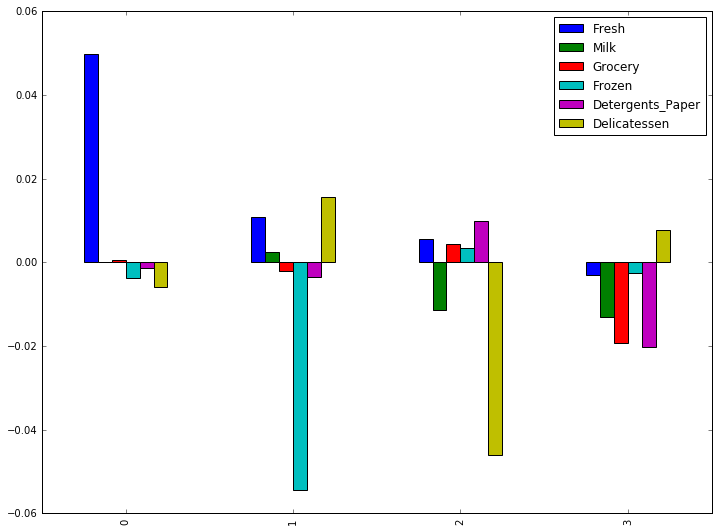

In [128]:
ax = ica_components.plot(kind="bar")

Answer: 
Each vector on the picture above shows relative consumption of different types of products by a group of customers. There are 4 ICA vectors representing different groups:
<ul>
    <li>
    Vector 0: "Fresh" has the highest weight, other features have relatively insignificant weights.
    </li>
    <li>
    Vector 1: "Frozen" has the highest weight, "Fresh" and "Delicatessen" have lower weights.
    </li>
    <li>
    Vector 2: "Delicatessen" has the highest weight, "Milk" and "Detergents_Paper" have lower weights, "Grocery", "Fresh" and "Frozen" have similar relatively small weights.
    </li>
    <li>
    Vector 3: "Grocery" and "Detergents_Paper" have the highest weights, "Milk" and "Delicatessen" have lower weight.
    </li>
</ul>

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The KMeans algorithm scales well to large number of samples and has been used across a large range of application areas in many different fields. Given enough time, K-means will always converge and it is the simplest clustering algorithm.<br>
Gaussian Mixture Models generilize K-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. Mixture models tend to have higher density clusters and it has soft classification available.<br>
Since the dataset even in reduced form has a large amount of outliers, Mixture Model clustering might be a better choice.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [129]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [130]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


In [142]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters = GMM(n_components=4, random_state=777).fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=777,
  thresh=None, tol=0.001, verbose=0)


In [143]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [146]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print centroids

[[ 0.82543271 -0.0898432 ]
 [-5.93037626  1.01999295]
 [-1.18284972 -2.89408021]
 [-0.68075339  0.6174958 ]]


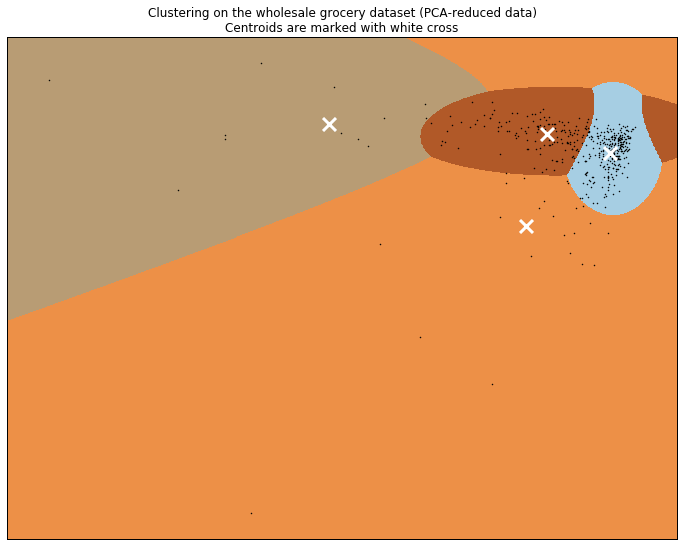

In [147]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: Results of the ICA algorithm made more sense to me because they represent relative weight of each feature and not just variance. 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 